Naive Implementation of Fibonacci Sequence:

In [8]:
from time import time  

In [2]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

This commented code takes a bit to run. I saved the times from my dektop to a pickle file

In [3]:
# times = []

# for n in range(50):
#     start = time()
#     fib(n)    
#     stop = time()
#     duration = stop-start
#     times.append((n, duration))

In [4]:
import pickle

#switch which line is commented if you want to get your own times
#should take around an hour

#pickle.dump( times, open( "fib_naive_time.p", "wb" ) )
times = pickle.load( open( "fib_naive_time.p", "rb" ) )

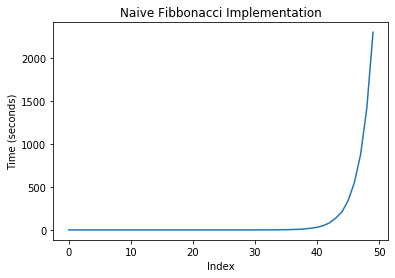

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(*zip(*times))
plt.title("Naive Fibbonacci Implementation")
plt.xlabel("Index")
plt.ylabel("Time (seconds)")
plt.savefig("fib_time.png", dpi=600)
plt.show()

Memoized Version

In [9]:
class Memoize:
    def __init__(self, fn):
        self.fn = fn
        self.memo = {}

    def __call__(self, *args):
        if args not in self.memo:
            self.memo[args] = self.fn(*args)
        return self.memo[args]

In [2]:
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

fib = Memoize(fib)

Example of what is stored:

In [3]:
fib(4)

3

In [5]:
print(fib.memo)

{(1,): 1, (0,): 0, (2,): 1, (3,): 2, (4,): 3}


In [10]:
%%timeit
@Memoize
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

times = []

for n in range(100000):
    start = time()
    fib(n)    
    stop = time()
    duration = stop-start
    times.append((n, duration))

291 ms ± 7.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [10]:
@Memoize
def fib(n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib(n-1) + fib(n-2)

times = []

for n in range(100000):
    start = time()
    fib(n)    
    stop = time()
    duration = stop-start
    times.append((n, duration))

A large Fibonacci number:

In [19]:
len(str(fib.memo[(99999,)]))

20899

Naive Implementation of Collatz Sequence:

In [1]:
def collatz(n):
    if n == 1:
        return 1
    elif n % 2 == 0:
        return n//2
    else:
        return 3*n + 1
    
def collatz_sequence(n):
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        sequence.append(n)
        
    return sequence

In [45]:
collatz_sequence(7)

[7, 22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16, 8, 4, 2, 1]

In [14]:
%%time
lengths = [collatz_sequence(n) for n in range(1, 1000000)]

Wall time: 1min 38s


In [15]:
lengths.index(max(lengths))

837798

Memoized version:

In [13]:
class Memoize:
    def __init__(self, fn):
        self.fn = fn
        self.memo = {}

    def __call__(self, *args):
        self.fn(*args, self.memo)

Version 1:

In [5]:
@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)

for n in range(1, 14):
    collatz_sequence(n)


print(collatz_sequence.memo)

{1: 1, 2: 2, 3: 8, 4: 3, 5: 6, 6: 9, 7: 17, 8: 4, 9: 20, 10: 7, 11: 15, 12: 10, 13: 10}


In [10]:
%%timeit
@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)
        
    return len(sequence)

for n in range(1, 1000000):
    collatz_sequence(n)

2.58 s ± 85.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [37]:
@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)

for n in range(1, 1000000):
    collatz_sequence(n)

Check that our answer is the same:

In [38]:
import operator
max(collatz_sequence.memo.items(), key=operator.itemgetter(1))[0]

837799

In [28]:
collatz_sequence.memo[837799]

525

Version 2:

In [8]:
@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)

    for index, value in enumerate(sequence[::-1]):
        cache[value] = cache[n] + index + 1
            
for n in range(1, 14):
    collatz_sequence(n)
    
collatz_sequence.memo

{1: 1,
 2: 2,
 3: 8,
 4: 3,
 8: 4,
 16: 5,
 5: 6,
 10: 7,
 6: 9,
 7: 17,
 20: 8,
 40: 9,
 13: 10,
 26: 11,
 52: 12,
 17: 13,
 34: 14,
 11: 15,
 22: 16,
 9: 20,
 14: 18,
 28: 19,
 12: 10}

In [16]:
%%timeit

@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)

    for index, value in enumerate(sequence[::-1]):
        cache[value] = cache[n] + index + 1

for n in range(1, 1000000):
    collatz_sequence(n)

2.03 s ± 16.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [14]:
@Memoize
def collatz_sequence(n, cache):
    if n == 1:
        cache[n] = 1
        return 1
    
    copy = n
    sequence = [n]
    
    while 1 not in sequence:
        n = collatz(n)
        if n in cache:
            cache[copy] = len(sequence) + cache[n]
            break
        else:
            sequence.append(n)

    for index, value in enumerate(sequence[::-1]):
        cache[value] = cache[n] + index + 1

for n in range(1, 1000000):
    collatz_sequence(n)

In [15]:
import operator
max(collatz_sequence.memo.items(), key=operator.itemgetter(1))[0]

837799